In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [2]:
tp_df = pd.read_excel("SimData_Transplant_Ver1.0.xls")
tp_df = resample(tp_df, n_samples=20000, replace=1)
tp_df

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
252,Female,A,home,Male,A,No,34,33.446369,40.122933,21.467095,27.574890,6.818314,6.818340,711.869557,1
3354,Male,O,home,Female,O,No,17,63.519717,30.716671,26.825953,24.558792,14.353784,16.319223,1890.014093,1
438,Male,A,home,Female,A,No,11,56.220194,35.848897,30.021367,20.200510,23.248548,29.601779,234.421218,1
802,Female,A,home,Male,A,No,7,50.450186,43.000612,29.985210,27.620236,19.538331,18.955805,1765.721400,1
1404,Female,A,inpt,Male,O,No,0,52.389800,63.141957,26.204500,26.333873,34.048790,34.239219,149.456562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Male,A,home,Female,A,No,26,56.874962,40.826542,39.737910,27.692980,28.273415,28.280934,1802.611114,1
3960,Male,O,home,Male,O,No,104,50.528682,76.411005,23.962351,29.166056,7.034904,7.032702,829.390460,1
168,Male,A,home,Male,A,No,71,60.894054,31.876350,21.587780,31.182141,19.727861,16.722346,5947.080294,1
888,Female,B,home,Female,B,No,60,42.132283,40.799471,39.468128,34.895577,13.171881,15.786446,3389.700446,1


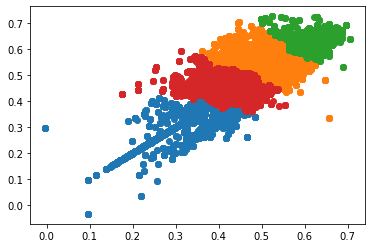

In [3]:
from copy import deepcopy
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm = 'l2')
train_df = deepcopy(tp_df)
train_df.loc[train_df['Time'] < 1825, 'Time'] = 0
train_df.loc[train_df['Time'] > 1825, 'Time'] = 1
od_array = np.array(train_df['Time'])
od_array = od_array.reshape(-1,1)
labels = train_df['Time']
train_df[['MELD','MELDNA', 'TransplantBMI']] = scaler.fit_transform(train_df[['MELD','MELDNA', 'TransplantBMI']])
train_df[['MELD','MELDNA', 'TransplantBMI']] = scaler.fit_transform(train_df[['MELD','MELDNA', 'TransplantBMI']])
train_df = train_df[['MELD','MELDNA', 'TransplantBMI']]
# define the model
#model.fit(train_df)
#yhat = model.predict(train_df)
# retrieve unique clusters
# create scatter plot for samples from each cluster


model = AgglomerativeClustering(n_clusters=4)
X = train_df
X = pd.get_dummies(X)
Y = labels
X = X.to_numpy()
model.fit(X)
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
count = 0
for cluster in clusters:
    # get row indexes for samples with this cluster
    count+=1
    row_ix = where(yhat == cluster)
    #print("Cluster: ",count, "Indexes", row_ix[0])
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
#print("Total Cluster")
pyplot.show()

tp_df['cluster'] = model.labels_

In [4]:
train_df = deepcopy(tp_df)
train_df = train_df[train_df['cluster'] == 1]
num_df = pd.get_dummies(train_df)
num_df = num_df.drop(['Waittime','Donor_Age','Donor_BMI','Cens', 'Donor_Sex_Female',\
                  'Donor_Sex_Male','Donor_Bloodtype_A', 'Donor_Bloodtype_B', 'Donor_Bloodtype_O',\
                  'Donor_Bloodtype_AB', 'Donor_DCD_No', 'Donor_DCD_Yes'], axis=1)


train_data = num_df
train_df = pd.DataFrame(train_data, columns=['Age_Tx', 'TransplantBMI', 'MELD', 'MELDNA', 'Time',  'Gender_Female', 'Gender_Male', 'Bloodtype_A', 'Bloodtype_AB', 'Bloodtype_B', 'Bloodtype_O',
                                            'Inpt_attx_home','Inpt_attx_icu','Inpt_attx_inpt','Inpt_attx_ventilated'])


train_df.loc[train_df['Time'] < 1825, 'Time'] = 0
train_df.loc[train_df['Time'] > 1825, 'Time'] = 1
od_array = np.array(train_df['Time'])
od_array = od_array.reshape(-1,1)
labels = train_df['Time']

train_df = train_df[['Age_Tx', 'TransplantBMI', 'MELD', 'MELDNA',  'Gender_Female', 'Gender_Male', 'Bloodtype_A', 'Bloodtype_AB', 'Bloodtype_B', 'Bloodtype_O',
                                            'Inpt_attx_home','Inpt_attx_icu','Inpt_attx_inpt','Inpt_attx_ventilated']]
scaler = Normalizer(norm = 'l2')
train_df= scaler.fit_transform(train_df)




from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df, labels, train_size=0.8,random_state= 42)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#print(X_train)
print(X_test)


'''
train_df[['MELD','MELDNA', 'TransplantBMI', 'Time', 'Age_Tx', 'Waittime']] = tp_df[['MELD','MELDNA', 'TransplantBMI', 'Time', 'Age_Tx', 'Waittime']]
train_df['cluster'] = yhat
train_df.loc[train_df['Time'] < 1825, 'Time'] = 0
train_df.loc[train_df['Time'] > 1825, 'Time'] = 1
od_array = np.array(train_df['Time'])
od_array = od_array.reshape(-1,1)
labels = train_df['Time']
train_df = train_df[['MELD','MELDNA', 'TransplantBMI', 'Age_Tx', 'Waittime']]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df, labels, train_size=0.8,random_state= 42)
'''


[[0.79937179 0.41632143 0.27881735 ... 0.         0.         0.01612206]
 [0.77937663 0.35975616 0.32086767 ... 0.         0.01534584 0.        ]
 [0.53928543 0.50182184 0.45280849 ... 0.         0.         0.        ]
 ...
 [0.86517803 0.32156194 0.2707587  ... 0.         0.01436722 0.        ]
 [0.79856025 0.35594904 0.29740671 ... 0.         0.         0.        ]
 [0.83696091 0.39180518 0.2689555  ... 0.         0.         0.        ]]


"\ntrain_df[['MELD','MELDNA', 'TransplantBMI', 'Time', 'Age_Tx', 'Waittime']] = tp_df[['MELD','MELDNA', 'TransplantBMI', 'Time', 'Age_Tx', 'Waittime']]\ntrain_df['cluster'] = yhat\ntrain_df.loc[train_df['Time'] < 1825, 'Time'] = 0\ntrain_df.loc[train_df['Time'] > 1825, 'Time'] = 1\nod_array = np.array(train_df['Time'])\nod_array = od_array.reshape(-1,1)\nlabels = train_df['Time']\ntrain_df = train_df[['MELD','MELDNA', 'TransplantBMI', 'Age_Tx', 'Waittime']]\n\n\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test = train_test_split(train_df, labels, train_size=0.8,random_state= 42)\n"

# SVC

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {'C': [0.1, 1, 0.01, 10], 'gamma': [10, 0.1, 0.01], 'kernel': ['rbf', 'sigmoid']}

In [7]:
from sklearn.svm import SVC
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(X_train,y_train)

In [8]:
#print(grid.best_estimator_)

In [9]:
from sklearn.svm import SVC
svc = SVC(C=10, gamma=10)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print('Classification Report \n',classification_report(y_test, y_pred))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.57      0.72      0.64       797
         1.0       0.54      0.38      0.45       697

    accuracy                           0.56      1494
   macro avg       0.56      0.55      0.54      1494
weighted avg       0.56      0.56      0.55      1494

Accuracy of our mode when applied on test set:  0.5622489959839357


# ANN

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [12]:
#Initialising the model
model=Sequential()
#adding the first layer and input layer
model.add(keras.Input(shape=(14,)))
model.add(Dense(units=128,kernel_initializer='random_normal',activation='relu'))
model.add(Dropout(.2))
#adding the second layer
model.add(Dense(units=128,kernel_initializer='random_normal',activation='relu'))
model.add(Dropout(.2))
#adding the output layer
model.add(Dense(units=1,kernel_initializer='random_normal',activation='sigmoid'))
model.add(Dropout(.2))

2022-07-12 16:44:36.739168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#Fitting the data
model.fit(X_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
632/632 [==============================] - 5s 6ms/step - loss: 2.1159 - accuracy: 0.5006
Epoch 2/20
632/632 [==============================] - 4s 6ms/step - loss: 2.1667 - accuracy: 0.5127
Epoch 3/20
632/632 [==============================] - 3s 4ms/step - loss: 2.0179 - accuracy: 0.5181
Epoch 4/20
632/632 [==============================] - 2s 3ms/step - loss: 2.0620 - accuracy: 0.5252
Epoch 5/20
632/632 [==============================] - 2s 3ms/step - loss: 2.0566 - accuracy: 0.5285
Epoch 6/20
632/632 [==============================] - 2s 3ms/step - loss: 2.0110 - accuracy: 0.5350
Epoch 7/20
632/632 [==============================] - 4s 7ms/step - loss: 2.1647 - accuracy: 0.5274
Epoch 8/20
632/632 [==============================] - 3s 5ms/step - loss: 2.1014 - accuracy: 0.5333
Epoch 9/20
632/632 [==============================] - 3s 4ms/step - loss: 2.1055 - accuracy: 0.5323
Epoch 10/20
632/632 [==============================] - 3s 5ms/step - loss: 2.0615 - accuracy: 0.5322

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=model.predict(X_test)
#converting the probablitiy obtained using the predict method to the binary output 
predictions=(predictions>0.5)
print('Classification Report \n',classification_report(y_test,predictions))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test,predictions))

47/47 [==============================] - 0s 2ms/step
Classification Report 
               precision    recall  f1-score   support

         0.0       0.56      0.95      0.70       797
         1.0       0.70      0.14      0.24       697

    accuracy                           0.57      1494
   macro avg       0.63      0.54      0.47      1494
weighted avg       0.62      0.57      0.48      1494

Accuracy of our mode when applied on test set:  0.57095046854083


# Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.1, 1, 10, 100, 0.01 ], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['none', 'l1', 'l2', 'elasticnet']}
log = LogisticRegression
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ................C=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.3s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=   0.3s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...............C=10, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   2.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.6s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.0s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..............C=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=100, penalty=none, solver=newton-cg; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   3.5s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.3s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   4.5s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, pena

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.1s


/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .............C=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [17]:
print(grid.best_estimator_)

LogisticRegression(C=0.1, penalty='none', solver='newton-cg')


In [18]:
log = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model = log.fit(X_train, y_train)

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
y_pred = model.predict(X_test)
y_true = y_test

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[466, 331],
       [364, 333]])

In [21]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.5310897524191105

In [22]:
402/(402+32+336+30)

0.5025

# Voting

In [23]:
clf1 = model
clf2 = SVC(C=10, gamma=10)
clf3 = LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('ANN', clf1), ('lr', clf2), ('svc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/likexin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
predictions=eclf1.predict(X_train)
#converting the probablitiy obtained using the predict method to the binary output 
print('Classification Report \n',classification_report(y_train,predictions))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_train, predictions))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.54      0.61      0.57      3157
         1.0       0.55      0.49      0.52      3157

    accuracy                           0.55      6314
   macro avg       0.55      0.55      0.55      6314
weighted avg       0.55      0.55      0.55      6314

Accuracy of our mode when applied on test set:  0.5481469749762433


In [26]:
print(X_train)

[[0.83696091 0.39180518 0.2689555  ... 0.         0.         0.        ]
 [0.86339791 0.35356449 0.23985221 ... 0.         0.01266222 0.        ]
 [0.6933507  0.45572884 0.40466684 ... 0.         0.01540414 0.        ]
 ...
 [0.803812   0.37996498 0.30774085 ... 0.         0.         0.        ]
 [0.69883361 0.47244295 0.33094309 ... 0.         0.01670297 0.        ]
 [0.7589257  0.4576863  0.29954055 ... 0.         0.         0.        ]]


In [27]:
import imblearn
print(imblearn.__version__)

0.9.1
